Enter the stock symbol (e.g., AAPL): aapl


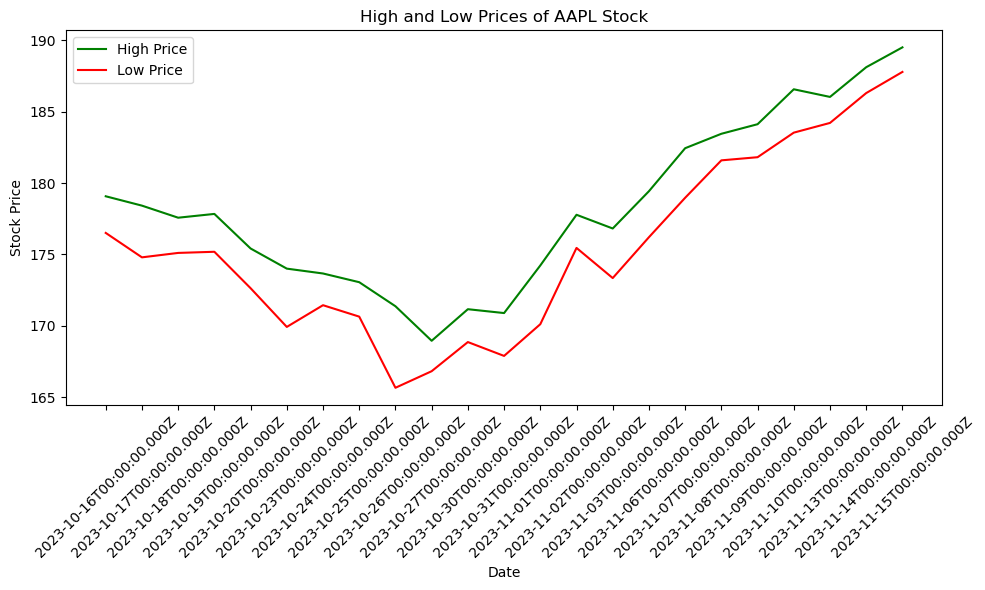

In [98]:
import requests
import matplotlib.pyplot as plt

headers = {
    'Content-Type': 'application/json'
}

# Take user input for the stock symbol
symbol = input("Enter the stock symbol (e.g., AAPL): ")

# Construct the API URL with the user-provided symbol
url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate=2023-10-16&token=32ebb78a8b18b28f3d54fd9a1950aff3f8369bd2"

# Make a GET request to fetch the data
response = requests.get(url, headers=headers)

if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract 'high' and 'low' prices and timestamps
    timestamps = [entry['date'] for entry in data]
    highs = [entry['high'] for entry in data]
    lows = [entry['low'] for entry in data]

    # Plotting the stock market graph with high and low prices
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, highs, label='High Price', color='green')
    plt.plot(timestamps, lows, label='Low Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'High and Low Prices of {symbol.upper()} Stock')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('Failed to fetch data. Check your API request.')


Enter Date (aise xxxx-yy-zz): 2022-11-11
The most profitable stock on 2022-11-11 is AMZN with a profit of 2.97%


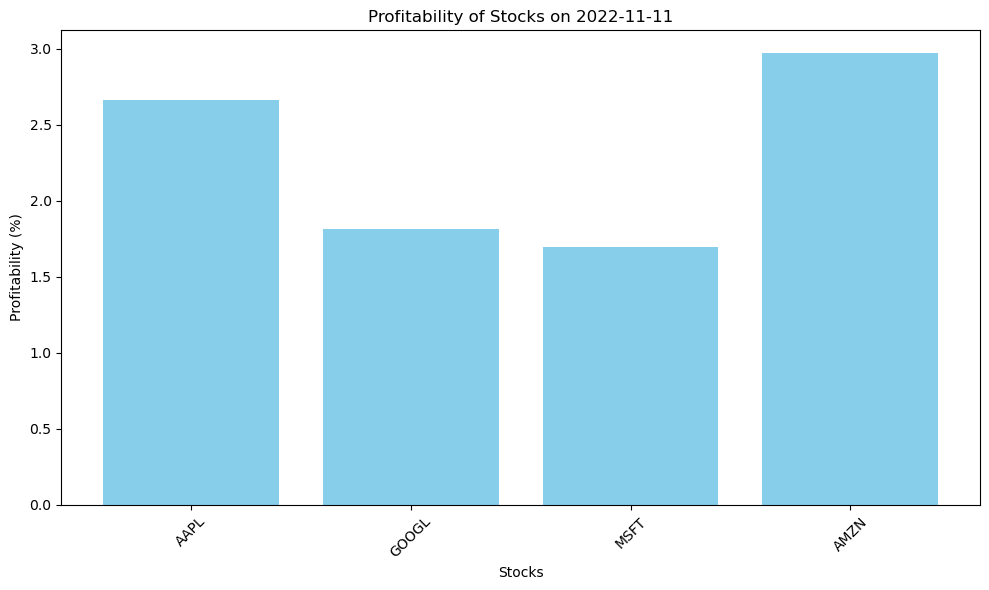

In [18]:
import requests
import matplotlib.pyplot as plt

# Function to fetch live stock data from Tiingo API and identify the most profitable stock for a given date
def get_most_profitable_stock(api_token, date):
    # Define stock symbols or configure as per requirement
    stock_symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB', 'TSLA', 'NFLX', 'INTC', 'NVDA', 'ADBE'] # Add more symbols as needed

    # Dictionary to store profitability of each stock
    profitability = {}

    # Fetch live data for each stock and calculate profitability for the specified date
    for symbol in stock_symbols:
        try:
            # Construct API URL for the specified date and stock symbol
            api_url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={date}&token={api_token}"

            # Make GET request to Tiingo API
            response = requests.get(api_url)

            if response.status_code == 200:
                data = response.json()
                if data:
                    # Extract relevant data for the specified date
                    data_for_date = [entry for entry in data if entry['date'].split('T')[0] == date]

                    if data_for_date:
                        # Calculate profitability as the percentage change in stock price
                        profit = ((data_for_date[0]['close'] - data_for_date[0]['open']) / data_for_date[0]['open']) * 100
                        profitability[symbol] = profit

            else:
              #  print(f"Failed to fetch data for {symbol}. Status code: {response.status_code}")
                    break
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")

    # Get the most profitable stock
    if profitability:
        most_profitable_stock = max(profitability, key=profitability.get)
        print(f"The most profitable stock on {date} is {most_profitable_stock} with a profit of {profitability[most_profitable_stock]:.2f}%")

        # Plotting profitability for each stock
        plt.figure(figsize=(10, 6))
        plt.bar(profitability.keys(), profitability.values(), color='skyblue')
        plt.xlabel('Stocks')
        plt.ylabel('Profitability (%)')
        plt.title(f'Profitability of Stocks on {date}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print("No data available or error in fetching data.")

# Enter your Tiingo API token
api_token = '32ebb78a8b18b28f3d54fd9a1950aff3f8369bd2'

# Specify the date for which you want to check profitability (YYYY-MM-DD format)
inty= input('Enter Date (aise xxxx-yy-zz): ')
input_date = inty

# Fetch live data and identify the most profitable stock for the specified date
get_most_profitable_stock(api_token, input_date)


In [132]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to prepare features and target variable for Random Forest model
def prepare_data(data):
    dates = data.index
    prices = data['Close'].values.tolist()
    return dates, prices

# Function to predict future stock price using Random Forest regression
def predict_stock_price(dates, prices, future_date):
    dates = dates.map(datetime.toordinal)
    dates = dates.values.reshape(-1, 1)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(dates, prices)

    future_date_ordinal = datetime.strptime(future_date, "%Y-%m-%d").toordinal()
    future_price = model.predict([[future_date_ordinal]])

    return future_price[0]

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2020-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    dates, prices = prepare_data(data)

    # Take future date input from the user
    future_date = input("Enter a future date (YYYY-MM-DD): ")

    try:
        # Predict future stock price
        future_price = predict_stock_price(dates, prices, future_date)

        print(f"Predicted stock price for {symbol} on {future_date} is ${future_price:.2f}")

    except ValueError:
        print("Invalid date format. Please enter date in YYYY-MM-DD format.")

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed
Enter a future date (YYYY-MM-DD): 2023-2-2
Predicted stock price for googl on 2023-2-2 is $88.17


## 

In [130]:
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for LSTM model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    # Create sequences for LSTM model
    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for LSTM model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for LSTM model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Predict stock prices
    predicted_prices_scaled = model.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

    # Inverse transform actual prices for evaluation
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate Mean Squared Error (MSE) on test data
    mse = mean_squared_error(y_test_inverse, predicted_prices)
    print(f"Mean Squared Error (MSE) on test data: {mse}")

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")



Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed


Epoch 1/10

6/6 [==============================] - 3s 8ms/step - loss: 0.2089
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0333
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0353
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0148
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0125
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0120
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 10/10
2/2 [==============================] - 1s 6ms/step
Mean Squared Error (MSE) on test data: 58.03321085694099


In [131]:
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for LSTM model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    # Create sequences for LSTM model
    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler

# Function to predict stock price for a future date using LSTM model
def predict_future_price(model, x_test, scaler, future_date):
    last_sequence = x_test[-1]  # Get the last sequence in test data
    last_sequence = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Predict stock price for the future date
    future_date_price_scaled = model.predict(last_sequence)
    future_date_price = scaler.inverse_transform(future_date_price_scaled)[0][0]

    print(f"Predicted stock price for {future_date} is: ${future_date_price:.2f}")

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for LSTM model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for LSTM model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Predict stock prices
    predicted_prices_scaled = model.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

    # Inverse transform actual prices for evaluation
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate Mean Squared Error (MSE) on test data
    mse = mean_squared_error(y_test_inverse, predicted_prices)
    print(f"Mean Squared Error (MSE) on test data: {mse}")

    # Predict stock price for a future date
    future_date_input = input("Enter a future date (YYYY-MM-DD) for prediction: ")
    predict_future_price(model, x_test, scaler, future_date_input)

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 3s 7ms/step - loss: 0.1597
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0252
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0321
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0124
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0126
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0116
Epoch 9/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 10/10
2/2 [==============================] - 1s 7ms/step
Mean Squared Error (MSE) on test data: 52.94779490163949
Enter a future date (YYYY-MM-DD) for prediction: 2023-2-2
1/1 [

In [133]:
import yfinance as yf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for LSTM model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    # Create sequences for LSTM model
    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler

# Function to predict stock price for a future date using LSTM model
def predict_future_price(model, x_train, scaler, future_date):
    last_sequence = x_train[-1]  # Get the last sequence in the training data
    last_sequence = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Predict stock price for the future date
    future_date_price_scaled = model.predict(last_sequence)
    future_date_price = scaler.inverse_transform(future_date_price_scaled)[0][0]

    print(f"Predicted stock price for {future_date} is: ${future_date_price:.2f}")

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for LSTM model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for LSTM model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Predict stock price for a future date
    future_date_input = input("Enter a future date (YYYY-MM-DD) for prediction: ")
    predict_future_price(model, x_train, scaler, future_date_input)

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 3s 7ms/step - loss: 0.2226
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0356
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0321
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0158
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0126
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0108
Epoch 10/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0110
Enter a future date (YYYY-MM-DD) for prediction: 2023-2-2
1/1 [==============================] - 1s 567ms

Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 2s 6ms/step - loss: 0.1878
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0361
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0150
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0179
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0108
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0115
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0116
Epoch 10/10
2/2 [==============================] - 1s 8ms/step


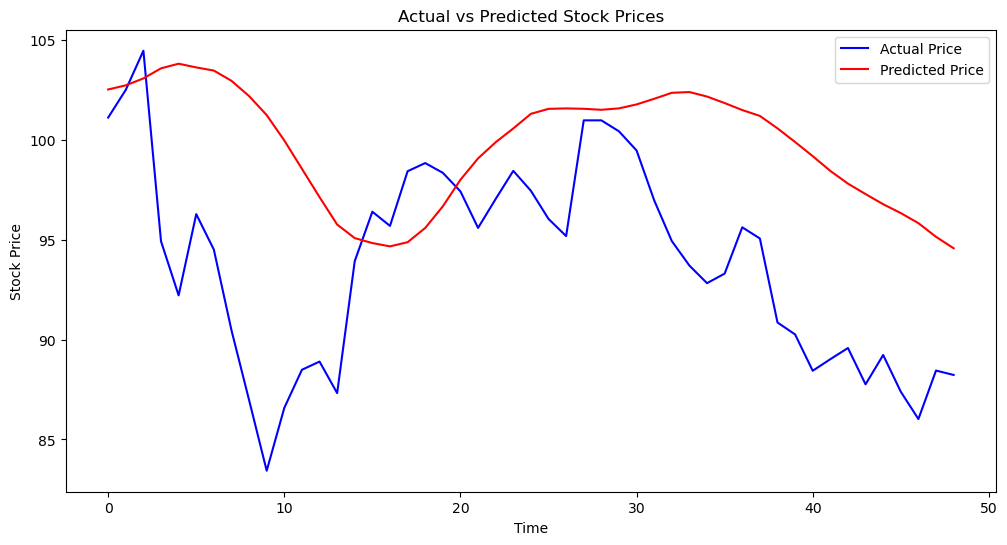

In [134]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for LSTM model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    # Create sequences for LSTM model
    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler

# Function to predict stock price for a future date using LSTM model
def predict_future_price(model, x_train, scaler, future_date):
    last_sequence = x_train[-1]  # Get the last sequence in the training data
    last_sequence = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Predict stock price for the future date
    future_date_price_scaled = model.predict(last_sequence)
    future_date_price = scaler.inverse_transform(future_date_price_scaled)[0][0]

    print(f"Predicted stock price for {future_date} is: ${future_date_price:.2f}")
    return future_date_price

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for LSTM model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for LSTM model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Predict stock prices for the test data
    predicted_prices_scaled = model.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

    # Inverse transform actual prices for evaluation
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plotting predicted vs actual prices
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inverse, color='blue', label='Actual Price')
    plt.plot(predicted_prices, color='red', label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


In [135]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for LSTM model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    # Create sequences for LSTM model
    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler

# Function to predict stock price for a future date using LSTM model
def predict_future_price(model, x_train, scaler):
    future_date_input = input("Enter a future date (YYYY-MM-DD) for prediction: ")
    future_date = datetime.strptime(future_date_input, '%Y-%m-%d')
    last_sequence = x_train[-1]  # Get the last sequence in the training data
    last_sequence = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Predict stock price for the future date
    future_date_price_scaled = model.predict(last_sequence)
    future_date_price = scaler.inverse_transform(future_date_price_scaled)[0][0]

    print(f"Predicted stock price for {future_date_input} is: ${future_date_price:.2f}")
    return future_date, future_date_price

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for LSTM model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for LSTM model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Predict stock price for a future date
    future_date, future_date_price = predict_future_price(model, x_train, scaler)
    print(future_date, future_date_price)

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 2s 7ms/step - loss: 0.1918
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0315
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0301
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0137
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0116
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0119
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 10/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0102
Enter a future date (YYYY-MM-DD) for prediction: 2023-2-2
1/1 [==============================] - 1s 569ms

Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 4s 8ms/step - loss: 0.1465
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0227
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0143
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0099
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0096
Epoch 10/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0118
Enter a future date (YYYY-MM-DD) for prediction: 2023-2-2
1/1 [==============================] - 1s 593ms

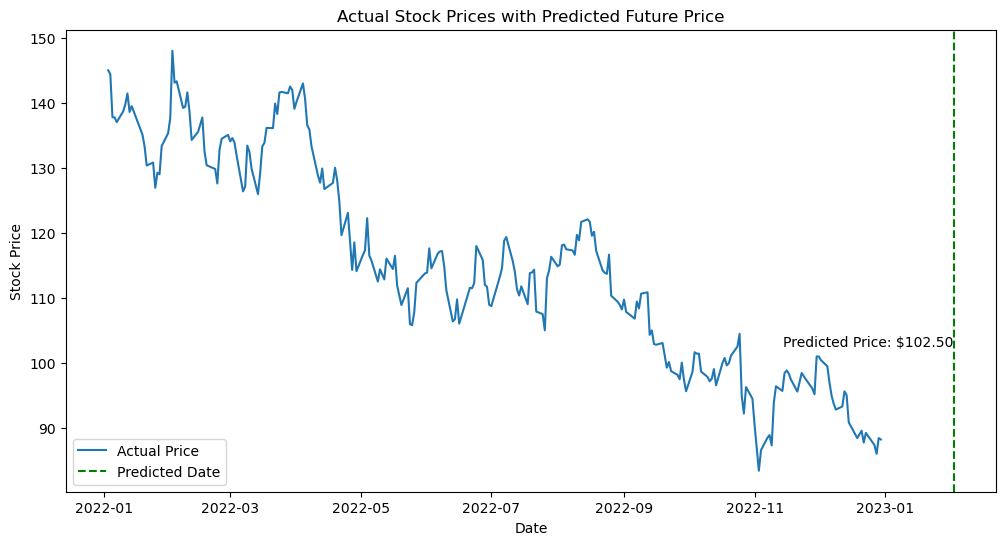

In [136]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for LSTM model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    # Create sequences for LSTM model
    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler

# Function to predict stock price for a future date using LSTM model
def predict_future_price(model, x_train, scaler):
    future_date_input = input("Enter a future date (YYYY-MM-DD) for prediction: ")
    future_date = datetime.strptime(future_date_input, '%Y-%m-%d')
    last_sequence = x_train[-1]  # Get the last sequence in the training data
    last_sequence = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Predict stock price for the future date
    future_date_price_scaled = model.predict(last_sequence)
    future_date_price = scaler.inverse_transform(future_date_price_scaled)[0][0]

    print(f"Predicted stock price for {future_date_input} is: ${future_date_price:.2f}")
    return future_date, future_date_price

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for LSTM model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for LSTM model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Predict stock price for a future date
    future_date, future_date_price = predict_future_price(model, x_train, scaler)

    # Plotting actual prices and predicted future price
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Actual Price')
    plt.axvline(x=future_date, color='green', linestyle='--', label='Predicted Date')
    plt.text(future_date, future_date_price, f'Predicted Price: ${future_date_price:.2f}', ha='right')
    plt.title('Actual Stock Prices with Predicted Future Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed


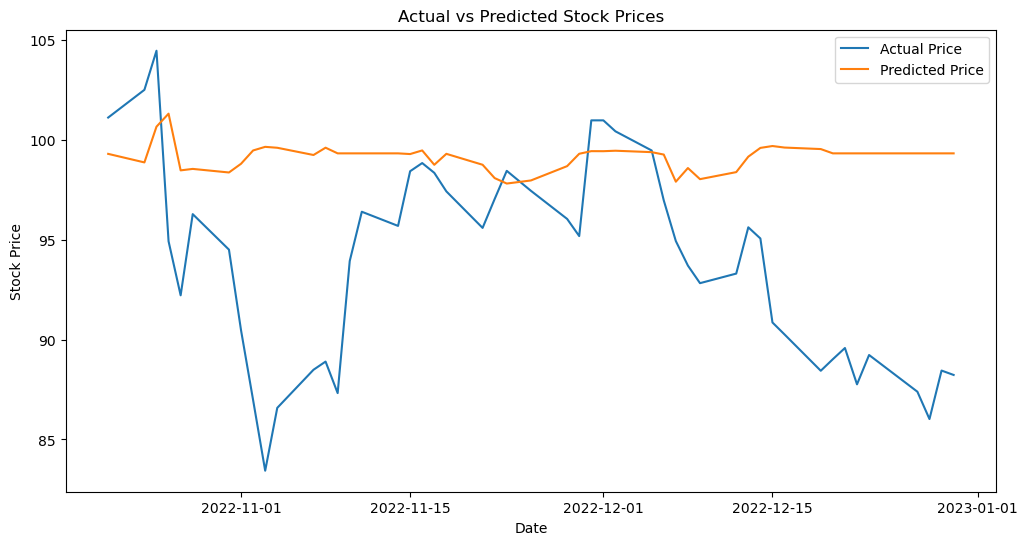

R² score: -1.1943


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for Random Forest model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices).flatten()

    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for Random Forest model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for Random Forest model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Random Forest model
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_

    # Predict stock prices for the test data
    predicted_prices = best_rf.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

    # Calculate R² score
    r_squared = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_prices)

    # Plotting actual prices vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
    plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    print(f"R² score: {r_squared:.4f}")

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed


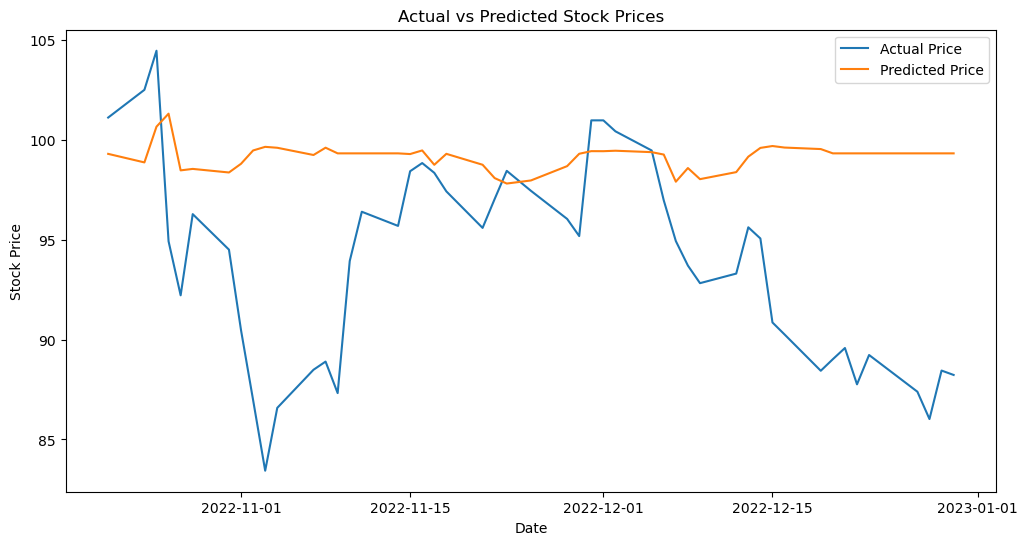

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for Random Forest model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices).flatten()

    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for Random Forest model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for Random Forest model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Random Forest model
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_

    # Predict stock prices for the test data
    predicted_prices = best_rf.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

    # Inverse transform actual prices for evaluation
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plotting actual prices vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], y_test_inverse, label='Actual Price')
    plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed


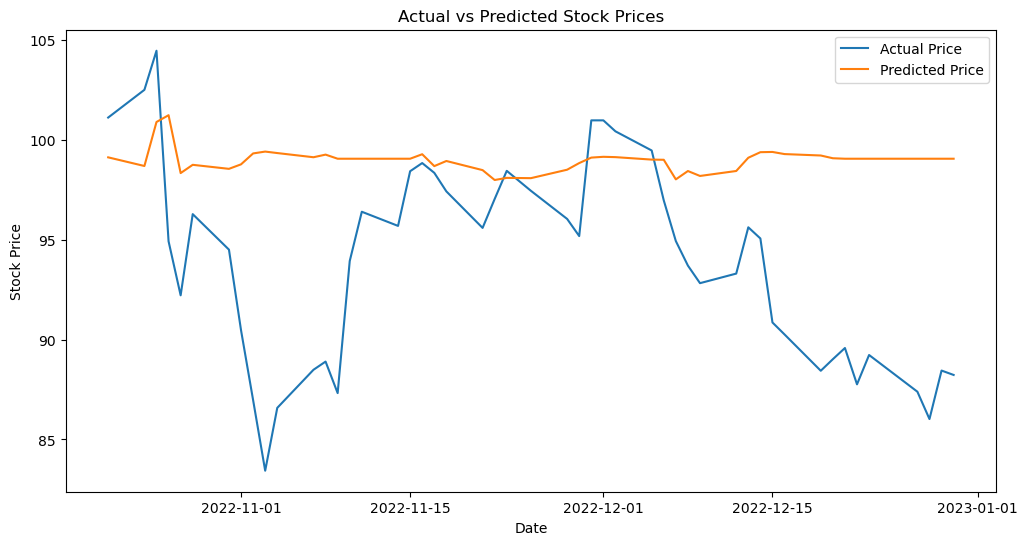

R² score: -1.1014
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for Random Forest model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices).flatten()

    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for Random Forest model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for Random Forest model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Random Forest model with extended hyperparameters
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_

    # Predict stock prices for the test data
    predicted_prices = best_rf.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

    # Calculate R² score
    r_squared = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_prices)

    # Plotting actual prices vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
    plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    print(f"R² score: {r_squared:.4f}")
    print(f"Best hyperparameters: {grid_search.best_params_}")

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): googl
[*********************100%%**********************]  1 of 1 completed


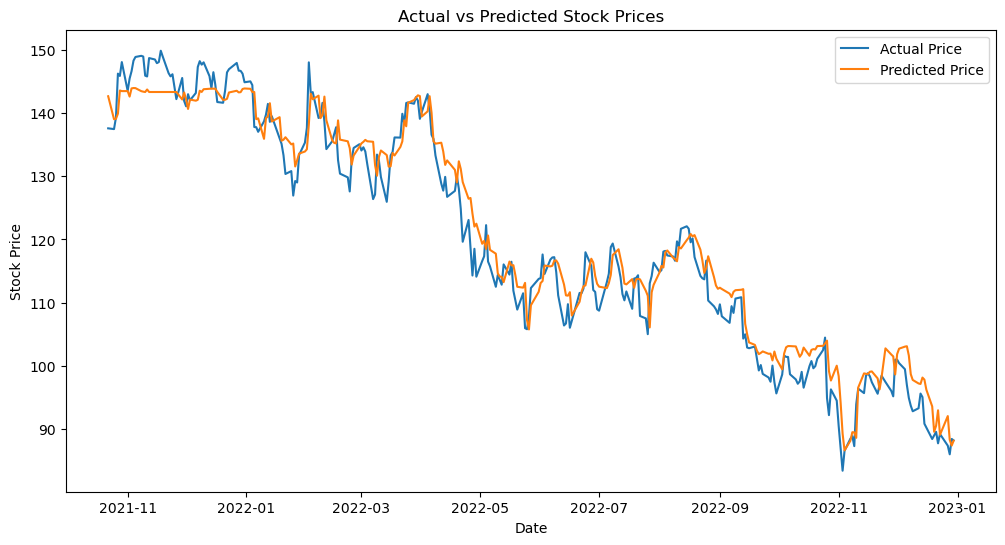

R² score: 0.9607
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [23]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for Random Forest model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices).flatten()

    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2017-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for Random Forest model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for Random Forest model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_index = int(len(x) * 0.8)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Random Forest model with extended hyperparameters
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_

    # Predict stock prices for the test data
    predicted_prices = scaler.inverse_transform(best_rf.predict(x_test).reshape(-1, 1))

    # Calculate R² score
    r_squared = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_prices)

    # Plotting actual prices vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
    plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    print(f"R² score: {r_squared:.4f}")
    print(f"Best hyperparameters: {grid_search.best_params_}")

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


In [41]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from datetime import datetime
from datetime import timedelta

if data is not None and not data.empty:
    
# Function to fetch historical stock data from yfinance
  def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for Random Forest model
  def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices).flatten()

    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2016-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for Random Forest model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for Random Forest model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_index = int(len(x) * 0.8)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Random Forest model with extended hyperparameters
    param_dist = {
        'n_estimators': np.arange(100, 1001, 100),
        'max_depth': np.arange(10, 110, 10),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 11)
    }

    rf = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3,
                                       scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    random_search.fit(x_train, y_train)

    # Get the best model
    best_rf = random_search.best_estimator_

    # Input future date for prediction
    future_date_input = input("Enter a future date (YYYY-MM-DD) for prediction: ")
    future_date = datetime.strptime(future_date_input, "%Y-%m-%d")
  # Calculate the sequence of historical data for the prediction date
    look_back_date = future_date - timedelta(days=sequence_length)  # Use timedelta correctly
    historical_data = data[data.index <= look_back_date]

    if not historical_data.empty:
        x_pred, _, _ = preprocess_data(historical_data, sequence_length)
        x_pred = x_pred[-1].reshape(1, -1)  # Use the last sequence for prediction

        # Predict stock price for the future date
        predicted_price = best_rf.predict(x_pred)
        predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

        print(f"Predicted closing price for {future_date.date()}: ${predicted_price[0][0]:.2f}")

    else:
        print("Insufficient historical data for prediction. Please choose an earlier date.")



Enter the company symbol (e.g., AAPL for Apple): aapl
[*********************100%%**********************]  1 of 1 completed
Enter a future date (YYYY-MM-DD) for prediction: 2023-1-1
Predicted closing price for 2023-01-01: $135.38


Enter the cryptocurrency pair (e.g., btcusd): ethusd
Enter the start date (YYYY-MM-DD): 2023-11-16


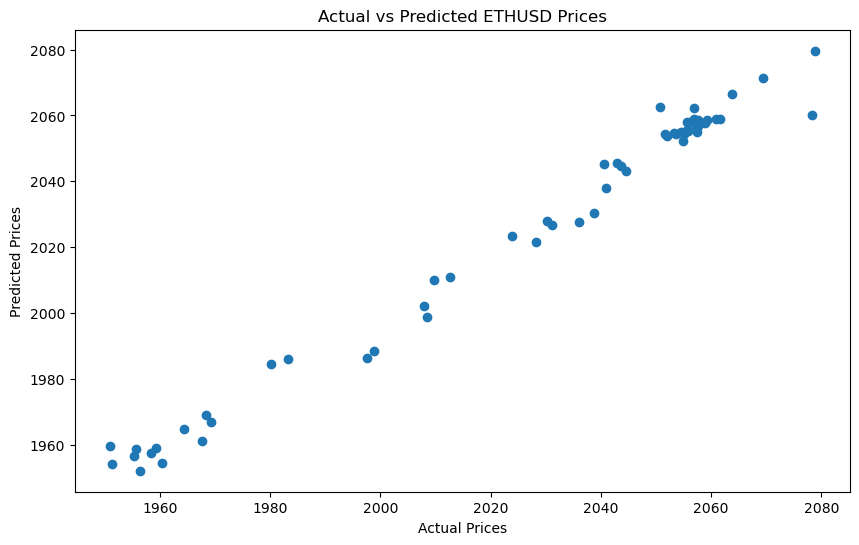

In [50]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ask user for input: Cryptocurrency pair and start date
currency_pair = input("Enter the cryptocurrency pair (e.g., btcusd): ").lower()
start_date = input("Enter the start date (YYYY-MM-DD): ")

# Fetch data from the API based on user input
url = f"https://api.tiingo.com/tiingo/crypto/prices?tickers={currency_pair}&startDate={start_date}&resampleFreq=5min&token=32ebb78a8b18b28f3d54fd9a1950aff3f8369bd2"
headers = {'Content-Type': 'application/json'}
response = requests.get(url, headers=headers)
data = response.json()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data[0]['priceData'])

# Convert timestamp to datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Feature engineering (if needed) - Creating additional features based on timestamp
df['hour'] = df.index.hour
df['minute'] = df.index.minute

# Define features and target variable
features = ['hour', 'minute']
target = 'close'

# Split data into features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
#print(f"Mean Squared Error: {mse}")

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted {currency_pair.upper()} Prices')
plt.show()


In [27]:
import requests
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'CXVKCJHVS0EJKBP5'

# Fetching data from Alpha Vantage API
url = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey={api_key}'
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    time_series_data = data.get('Time Series FX (Daily)')
else:
    print("Failed to fetch data. Status code:", response.status_code)
    time_series_data = None

# Preparing data for model training
if time_series_data:
    df = pd.DataFrame(time_series_data).transpose()
    df.index = pd.to_datetime(df.index)
    df = df.astype(float)
    df = df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close'})
    
    # Adding features for prediction
    df['Previous_Close'] = df['Close'].shift(1)
    df['Price_Change'] = df['Close'] - df['Previous_Close']
    df.dropna(inplace=True)
    
    # Selecting features and target variable
    features = ['Previous_Close']
    target = 'Price_Change'
    X = df[features]
    y = df[target]
    
    # Splitting data into training and testing sets
    train_size = int(len(df) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Training the Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predicting future Forex rates
    future_date = datetime.now() + timedelta(days=1)
    future_data = {
        'Previous_Close': [df.iloc[-1]['Close']]
    }
    future_df = pd.DataFrame(future_data)
    predicted_price_change = rf.predict(future_df)
    
    # Calculating predicted future close price
    predicted_close_price = df.iloc[-1]['Close'] + predicted_price_change[0]
    
    print(f"Predicted close price for {future_date.date()}: {predicted_close_price:.4f}")
else:
    print("No data available for model training.")


Predicted close price for 2023-11-18: 1.0930


In [28]:
import requests
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'CXVKCJHVS0EJKBP5'

def fetch_forex_data(from_currency, to_currency):
    url = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol={from_currency}&to_symbol={to_currency}&apikey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data.get('Time Series FX (Daily)')
    else:
        print("Failed to fetch data. Status code:", response.status_code)
        return None

# Function to predict future prices for a given currency pair
def predict_future_price(from_currency, to_currency, future_date):
    data = fetch_forex_data(from_currency, to_currency)
    if data is not None:
        df = pd.DataFrame(data).transpose().astype(float)
        df.index = pd.to_datetime(df.index)
        df = df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close'})
        
        # Adding features for prediction
        df['Previous_Close'] = df['Close'].shift(1)
        df['Price_Change'] = df['Close'] - df['Previous_Close']
        df.dropna(inplace=True)
        
        # Selecting features and target variable
        features = ['Previous_Close']
        target = 'Price_Change'
        X = df[features]
        y = df[target]
        
        # Training the Random Forest model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X, y)
        
        # Predicting future Forex rate for the given date
        future_data = {
            'Previous_Close': [df.iloc[-1]['Close']]
        }
        future_df = pd.DataFrame(future_data)
        predicted_price_change = rf.predict(future_df)
        
        # Calculating predicted future close price
        predicted_close_price = df.iloc[-1]['Close'] + predicted_price_change[0]
        return predicted_close_price
    else:
        return None

# Example usage:

# Define the currencies you want to compare
currency_pairs = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF']  # Add more currency pairs if needed

# Input future date for prediction
future_date_input = input("Enter a future date (YYYY-MM-DD) for prediction: ")
future_date = datetime.strptime(future_date_input, "%Y-%m-%d")

# Predict future prices for each currency pair
predicted_prices = {}
for pair in currency_pairs:
    from_currency, to_currency = pair.split('/')
    predicted_close_price = predict_future_price(from_currency, to_currency, future_date)
    if predicted_close_price is not None:
        predicted_prices[pair] = predicted_close_price

# Find the currency pair with the highest predicted close price
best_currency = max(predicted_prices, key=predicted_prices.get)
print(f"The best predicted currency on {future_date.date()} is: {best_currency}, Predicted Price: {predicted_prices[best_currency]:.4f}")


Enter a future date (YYYY-MM-DD) for prediction: 2023-12-12
The best predicted currency on 2023-12-12 is: USD/JPY, Predicted Price: 144.4226
